## Contours <br>
<br>
How to find and access the outlines and extract objects from images using contours,masks and cropping ? <br>
Using Contours.<br>



In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

found 4 contours


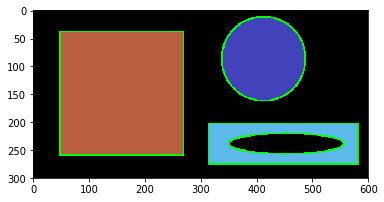

In [11]:
file="/mnt/c/cnn_dl/data/basic_shapes.png"

image = cv2.imread(file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
#show
plt.figure()
plt.imshow(gray)

#find all contours
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )
cnts = imutils.grab_contours(cnts)
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0,255,0), 2)
print("found {} contours".format(len(cnts)))

plt.imshow(clone)
#cv2.waitKey(0)

drawing contours #1
drawing contours #2
drawing contours #3
drawing contours #4


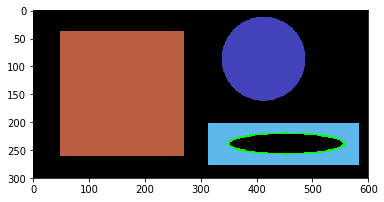

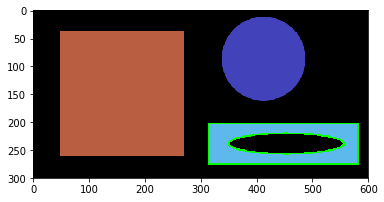

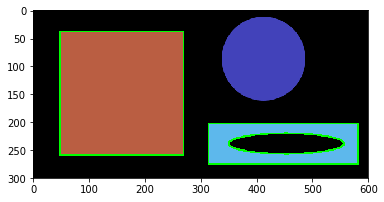

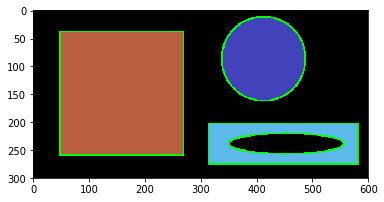

In [13]:
# re-clone the image and close all open windows

clone = image.copy()
cv2.destroyAllWindows()

#loop over the contours individually and draw each of them;
for (i,c) in enumerate(cnts):
    print("drawing contours #{}".format(i+1))
    cv2.drawContours( clone, [c], -1, (0,255,0), 2 )
    plt.figure()
    plt.imshow(clone)

found 3 external contours


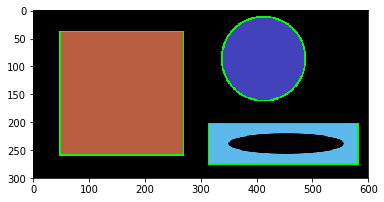

In [15]:
#re-clone the image and keep external

clone = image.copy()
cv2.destroyAllWindows()

#find the contours and keep external 
cnts = cv2.findContours( gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
cnts = imutils.grab_contours(cnts)
cv2.drawContours( clone, cnts, -1, (0,255,0), 2 )
print("found {} external contours".format( len(cnts)))
plt.figure()
plt.imshow(clone)

## Using both contours and masks together <br>

Problem: Just access only rectangle and ignore all other shapes ? <br>
loop over contours individually, draw a mask for the contour and then appy bitwise AND;

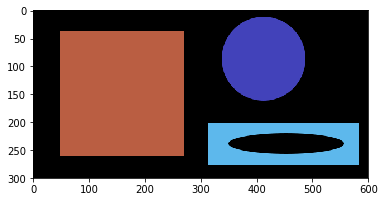

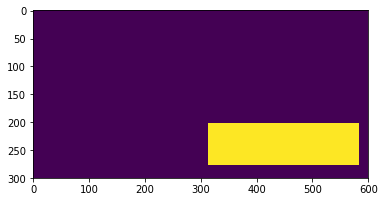

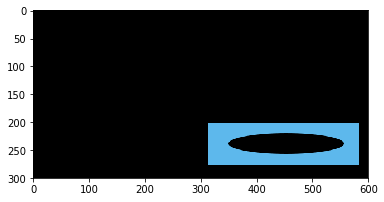

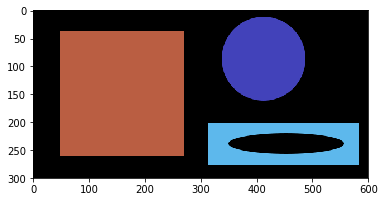

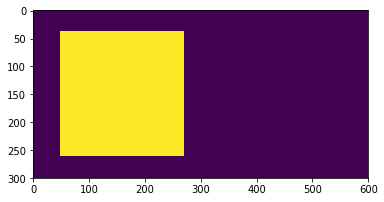

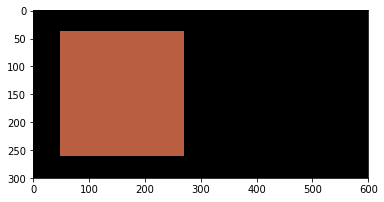

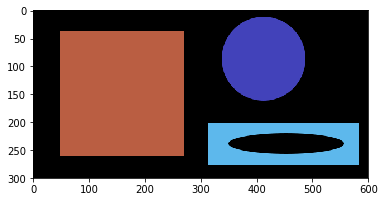

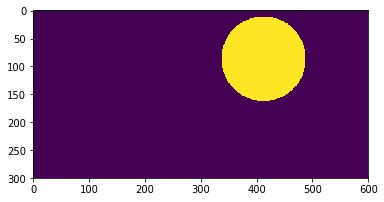

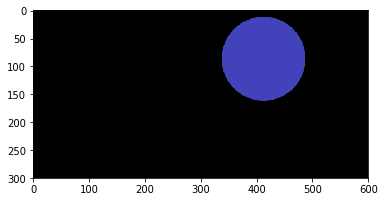

In [17]:
#re-clone the image
clone = image.copy()
cv2.destroyAllWindows()

#loop over all contours
for c in cnts:
    #construct a mask by drawing only the current contour
    mask = np.zeros( gray.shape, dtype='uint8' )
    cv2.drawContours( mask, [c], -1, 255, -1 )
    
    #shoe mask and image
    plt.figure()
    plt.imshow(image)
    plt.figure()
    plt.imshow(mask)
    plt.figure()
    plt.imshow( cv2.bitwise_and( image, image, mask=mask))

Usage: automatic License plate Identification system, handwritten characters and digits to recognize.